In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters

In [2]:
register_matplotlib_converters()

In [3]:
base = pd.read_csv("../../Arquivos/AirPassengers.csv")
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [7]:
#conversão dos atributos que estâo no formato string para formato de data: Ano-Mês
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')

base = pd.read_csv('../../Arquivos/AirPassengers.csv', parse_dates= ['Month'],
                   index_col='Month', date_parser=dateparse)
base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [9]:
ts = base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [10]:
ts[1]

118

In [11]:
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [12]:
ts[datetime(1949,2,1)]

118

In [13]:
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [14]:
ts[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [15]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [16]:
#valores Maximos
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [17]:
#valores Minimos
ts.index.min()

Timestamp('1949-01-01 00:00:00')

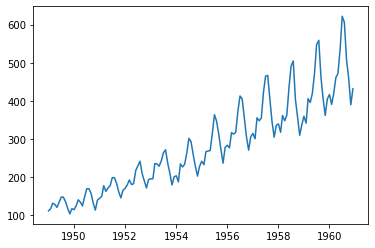

In [18]:
#visualização da série temporal completa
plt.plot(ts)

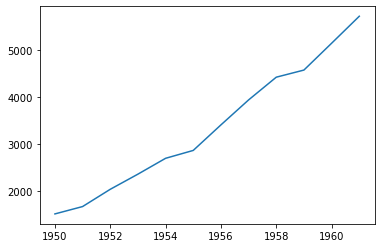

In [19]:
#visualização por ano
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)

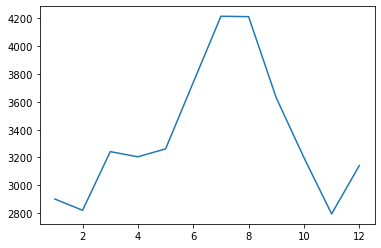

In [20]:
# por mes
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

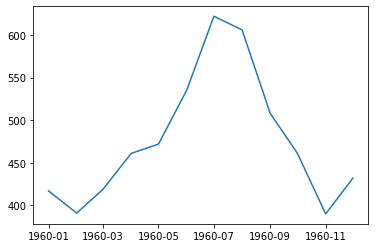

In [21]:
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)

